In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**IMPORTING ESSENTIAL LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

###**IMPORTING THE DATASET**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/exchanges.csv", parse_dates=['date'], index_col='date')
df.sort_values(by="date", inplace=True)
df = df.rename(columns={'date': 'Date'})
df

,ARS,AUD,BHD,BWP,BRL,BND,BGN,CAD,CLP,CNY,...,SEK,CHF,TWD,THB,TTD,TRY,AED,GBP,USD,VES
date,,,,,,,,,,,,,,,,,,,,,
2015-03-01,9.762668,1.433419,0.422079,10.764166,3.183447,1.525428,1.955987,1.400696,690.742259,7.014342,...,9.334935,1.068032,35.211097,36.236030,7.122094,2.808650,4.112076,0.725205,1.119572,7.108841e+00
2015-03-02,9.770546,1.438417,0.421791,10.844388,3.219807,1.527631,1.955717,1.402645,690.610741,7.017533,...,9.337911,1.068673,35.141306,36.190474,7.099379,2.817608,4.110071,0.727934,1.118982,7.102928e+00
2015-03-03,9.793759,1.429992,0.422667,10.895554,3.251596,1.526665,1.955976,1.395831,691.688817,7.031866,...,9.261799,1.075242,35.178697,36.280413,7.085824,2.842026,4.117409,0.728482,1.120978,7.090012e+00
2015-03-04,9.677446,1.415177,0.417256,10.767706,3.297677,1.514205,1.955855,1.376768,685.469548,6.942926,...,9.250519,1.067296,34.802922,35.884054,7.030685,2.838419,4.065204,0.725176,1.106780,7.025422e+00
2015-03-05,9.631754,1.417938,0.415159,10.733688,3.297350,1.509835,1.955812,1.373682,683.535905,6.903019,...,9.202148,1.071526,34.651036,35.705765,6.978941,2.874020,4.043955,0.722884,1.100982,6.990800e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-23,373.218567,1.656424,0.401037,14.516027,5.256636,1.456425,1.955830,1.438471,952.941826,7.765245,...,11.877410,0.966943,34.276532,38.462110,7.219858,28.928246,3.917041,0.871362,1.066587,3.611295e+06
2023-09-23,373.086317,1.656563,0.400895,14.510883,5.254773,1.455908,1.955830,1.437961,952.604150,7.739557,...,11.873201,0.966600,34.264386,38.469257,7.217299,28.917995,3.915653,0.871053,1.066209,3.610015e+06
2023-09-24,372.730047,1.655157,0.400396,14.492839,5.255703,1.454483,1.955830,1.436278,950.961910,7.727800,...,11.859351,0.965425,34.276781,38.416279,7.208358,28.872849,3.910784,0.870003,1.064883,3.604572e+06


In [4]:
php_series = df['PHP']
php_series

date
2015-03-01    49.372310
2015-03-02    49.351223
2015-03-03    49.386921
2015-03-04    48.870705
2015-03-05    48.547762
                ...    
2023-09-23    60.603935
2023-09-23    60.582460
2023-09-24    60.506767
2023-09-24    60.509371
2023-09-25    60.238002
Name: PHP, Length: 3239, dtype: float64

###**GRAPHING THE CHINESE YUAN**

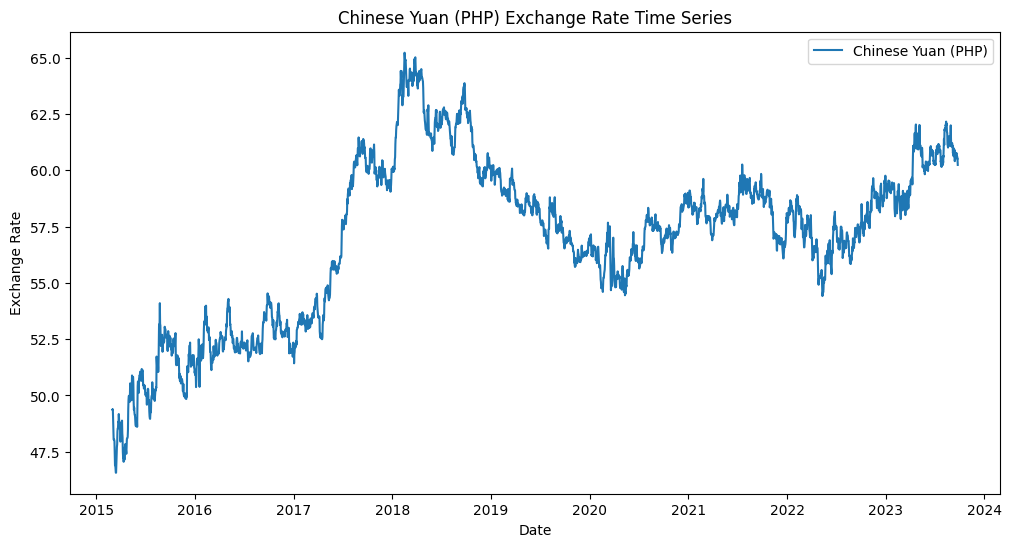

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(php_series.index, php_series, label='Chinese Yuan (PHP)')
plt.title('Chinese Yuan (PHP) Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [6]:
mean_exchange_rate = php_series.mean()
std_deviation = php_series.std()
print(mean_exchange_rate)
print(std_deviation)

57.087638937943815
3.6358647834385778


###**CREATING A ROLLING WINDOW OF 100 DAYS**

In [7]:
rolling_mean = php_series.rolling(window=100).mean()

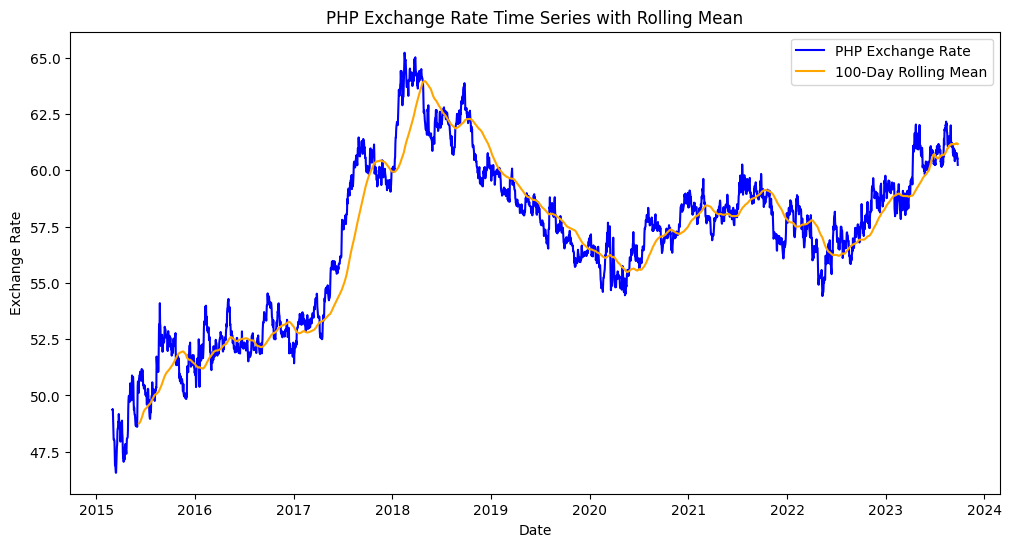

In [8]:
# Plot the time series data and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(php_series.index, php_series, label='PHP Exchange Rate', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='100-Day Rolling Mean', color='orange')
plt.title('PHP Exchange Rate Time Series with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


###**TIME SERIES WITH KERAS**

In [9]:
php_series1 = df[['PHP']]
php_series1

,PHP
date,
2015-03-01,49.372310
2015-03-02,49.351223
2015-03-03,49.386921
2015-03-04,48.870705
2015-03-05,48.547762
...,...
2023-09-23,60.603935
2023-09-23,60.582460
2023-09-24,60.506767


In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = MinMaxScaler()
php_series1= scaler.fit_transform(php_series1)

# Split the data into training and testing sets
train_size = int(len(php_series1) * 0.80)
test_size = len(php_series1) - train_size
train_data, test_data = php_series1[0:train_size], php_series1[train_size:len(php_series1)]

# Create sequences for time series forecasting
def create_sequences(php_series1, look_back):
    X, y = [], []
    for i in range(len(php_series1) - look_back):
        X.append(php_series1[i:(i+look_back), 0])
        y.append(php_series1[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")



Epoch 1/100
81/81 [==============================] - 5s 21ms/step - loss: 0.0372
Epoch 2/100
81/81 [==============================] - 2s 19ms/step - loss: 0.0015
Epoch 3/100
81/81 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 4/100
81/81 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 5/100
81/81 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 6/100
81/81 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 7/100
81/81 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 8/100
81/81 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 9/100
81/81 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 10/100
81/81 [==============================] - 1s 13ms/step - loss: 9.6132e-04
Epoch 11/100
81/81 [==============================] - 1s 13ms/step - loss: 9.5007e-04
Epoch 12/100
81/81 [==============================] - 1s 17ms/step - loss: 9.2557e-04
Epoch 13/100


###**GRAPH PREDICTED AND ACTUAL**

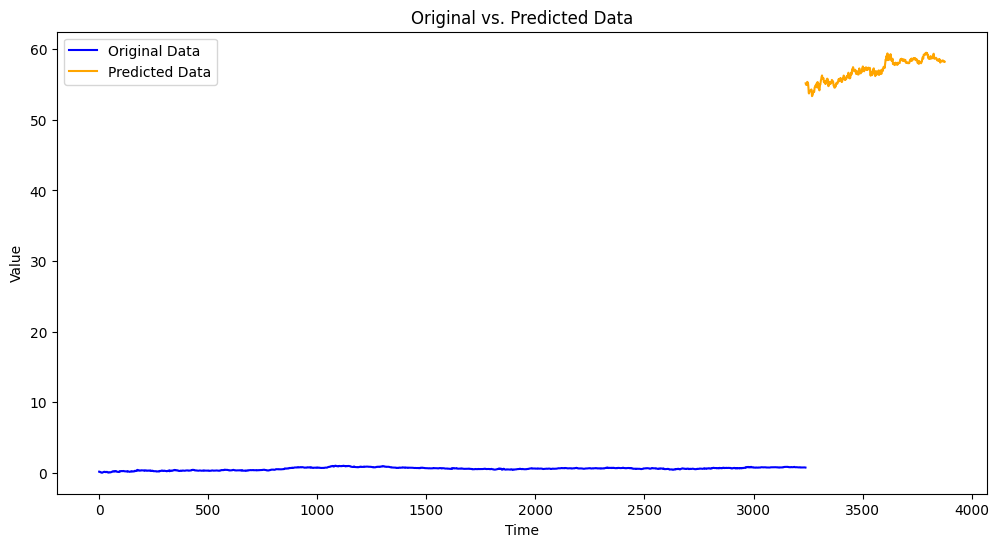

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(php_series1)), php_series1, label='Original Data', color='blue')
plt.plot(np.arange(len(php_series1), len(php_series1) + len(test_predict)), test_predict, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

###**ANOMALY DETECTION**

In [12]:
from sklearn.ensemble import IsolationForest
php_series2 = df[['PHP']]
php_series2

,PHP
date,
2015-03-01,49.372310
2015-03-02,49.351223
2015-03-03,49.386921
2015-03-04,48.870705
2015-03-05,48.547762
...,...
2023-09-23,60.603935
2023-09-23,60.582460
2023-09-24,60.506767


In [13]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(php_series2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [14]:
php_series2['scores']=model.decision_function(php_series2[['PHP']])
php_series2['anomaly']=model.predict(php_series2[['PHP']])
php_series2.head()

<ipython-input-14-d35f7b3285fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  php_series2['scores']=model.decision_function(php_series2[['PHP']])
<ipython-input-14-d35f7b3285fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  php_series2['anomaly']=model.predict(php_series2[['PHP']])


,PHP,scores,anomaly
date,,,
2015-03-01,49.372310,-0.076455,-1
2015-03-02,49.351223,-0.081012,-1
2015-03-03,49.386921,-0.076455,-1
2015-03-04,48.870705,-0.091394,-1
2015-03-05,48.547762,-0.110053,-1


In [15]:
# Visualize anomalies (you can adjust this based on your needs)
anomaly=php_series2.loc[php_series2['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                  PHP    scores  anomaly
date                                    
2015-03-01  49.372310 -0.076455       -1
2015-03-02  49.351223 -0.081012       -1
2015-03-03  49.386921 -0.076455       -1
2015-03-04  48.870705 -0.091394       -1
2015-03-05  48.547762 -0.110053       -1
...               ...       ...      ...
2018-09-28  62.679213 -0.006214       -1
2018-09-29  62.757437 -0.015576       -1
2018-09-30  62.756738 -0.015576       -1
2018-10-01  62.676002 -0.005437       -1
2018-10-02  62.761706 -0.013328       -1

[322 rows x 3 columns]


In [16]:
outliers_counter = len(php_series2[php_series2['PHP'] > 99999])
outliers_counter

0

###**CREATING A FOREX PORTFOLIO**

In [17]:
df

,ARS,AUD,BHD,BWP,BRL,BND,BGN,CAD,CLP,CNY,...,SEK,CHF,TWD,THB,TTD,TRY,AED,GBP,USD,VES
date,,,,,,,,,,,,,,,,,,,,,
2015-03-01,9.762668,1.433419,0.422079,10.764166,3.183447,1.525428,1.955987,1.400696,690.742259,7.014342,...,9.334935,1.068032,35.211097,36.236030,7.122094,2.808650,4.112076,0.725205,1.119572,7.108841e+00
2015-03-02,9.770546,1.438417,0.421791,10.844388,3.219807,1.527631,1.955717,1.402645,690.610741,7.017533,...,9.337911,1.068673,35.141306,36.190474,7.099379,2.817608,4.110071,0.727934,1.118982,7.102928e+00
2015-03-03,9.793759,1.429992,0.422667,10.895554,3.251596,1.526665,1.955976,1.395831,691.688817,7.031866,...,9.261799,1.075242,35.178697,36.280413,7.085824,2.842026,4.117409,0.728482,1.120978,7.090012e+00
2015-03-04,9.677446,1.415177,0.417256,10.767706,3.297677,1.514205,1.955855,1.376768,685.469548,6.942926,...,9.250519,1.067296,34.802922,35.884054,7.030685,2.838419,4.065204,0.725176,1.106780,7.025422e+00
2015-03-05,9.631754,1.417938,0.415159,10.733688,3.297350,1.509835,1.955812,1.373682,683.535905,6.903019,...,9.202148,1.071526,34.651036,35.705765,6.978941,2.874020,4.043955,0.722884,1.100982,6.990800e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-23,373.218567,1.656424,0.401037,14.516027,5.256636,1.456425,1.955830,1.438471,952.941826,7.765245,...,11.877410,0.966943,34.276532,38.462110,7.219858,28.928246,3.917041,0.871362,1.066587,3.611295e+06
2023-09-23,373.086317,1.656563,0.400895,14.510883,5.254773,1.455908,1.955830,1.437961,952.604150,7.739557,...,11.873201,0.966600,34.264386,38.469257,7.217299,28.917995,3.915653,0.871053,1.066209,3.610015e+06
2023-09-24,372.730047,1.655157,0.400396,14.492839,5.255703,1.454483,1.955830,1.436278,950.961910,7.727800,...,11.859351,0.965425,34.276781,38.416279,7.208358,28.872849,3.910784,0.870003,1.064883,3.604572e+06


In [18]:
fp1 = df[['GBP', 'USD', 'JPY', 'PHP']]
fp1

,GBP,USD,JPY,PHP
date,,,,
2015-03-01,0.725205,1.119572,133.928792,49.372310
2015-03-02,0.727934,1.118982,134.332336,49.351223
2015-03-03,0.728482,1.120978,133.953229,49.386921
2015-03-04,0.725176,1.106780,132.556499,48.870705
2015-03-05,0.722884,1.100982,132.361310,48.547762
...,...,...,...,...
2023-09-23,0.871362,1.066587,158.181147,60.603935
2023-09-23,0.871053,1.066209,158.125095,60.582460
2023-09-24,0.870003,1.064883,158.095640,60.506767


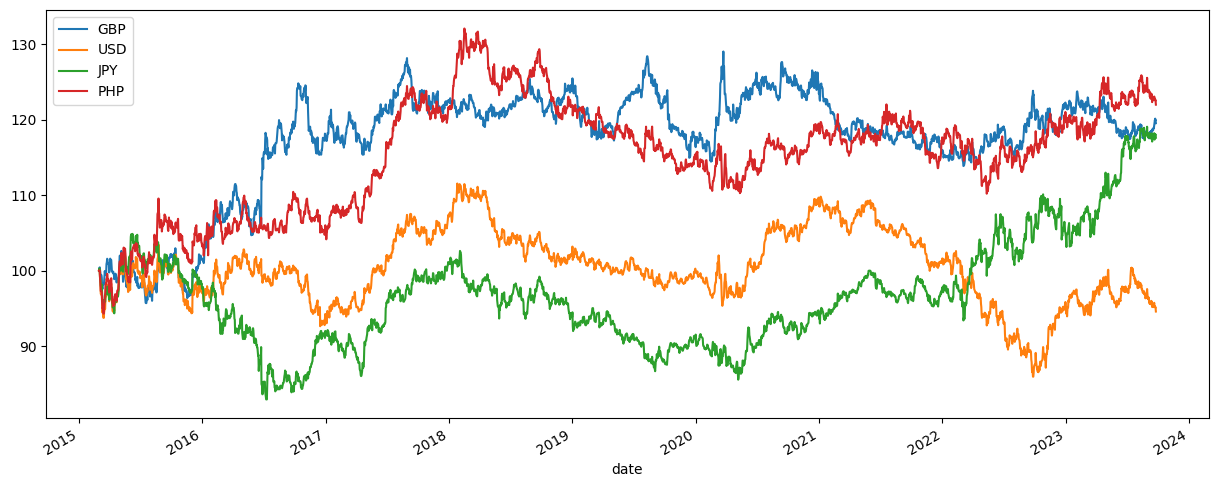

In [19]:
#normalization to 100
fp1.iloc[0]
(fp1 / fp1.iloc[0] * 100).plot(figsize = (15, 6));
plt.show() # graphing the movement of the 4 different currencies